In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import re

In [331]:
e1 = pd.read_csv("/content/api_data_aadhar_enrolment_0_500000.csv")
e2 = pd.read_csv("/content/api_data_aadhar_enrolment_1000000_1006029.csv")
e3 = pd.read_csv("/content/api_data_aadhar_enrolment_500000_1000000.csv")

In [332]:
print(e1.shape)
print(e2.shape)
print(e3.shape)

(500000, 7)
(6029, 7)
(500000, 7)


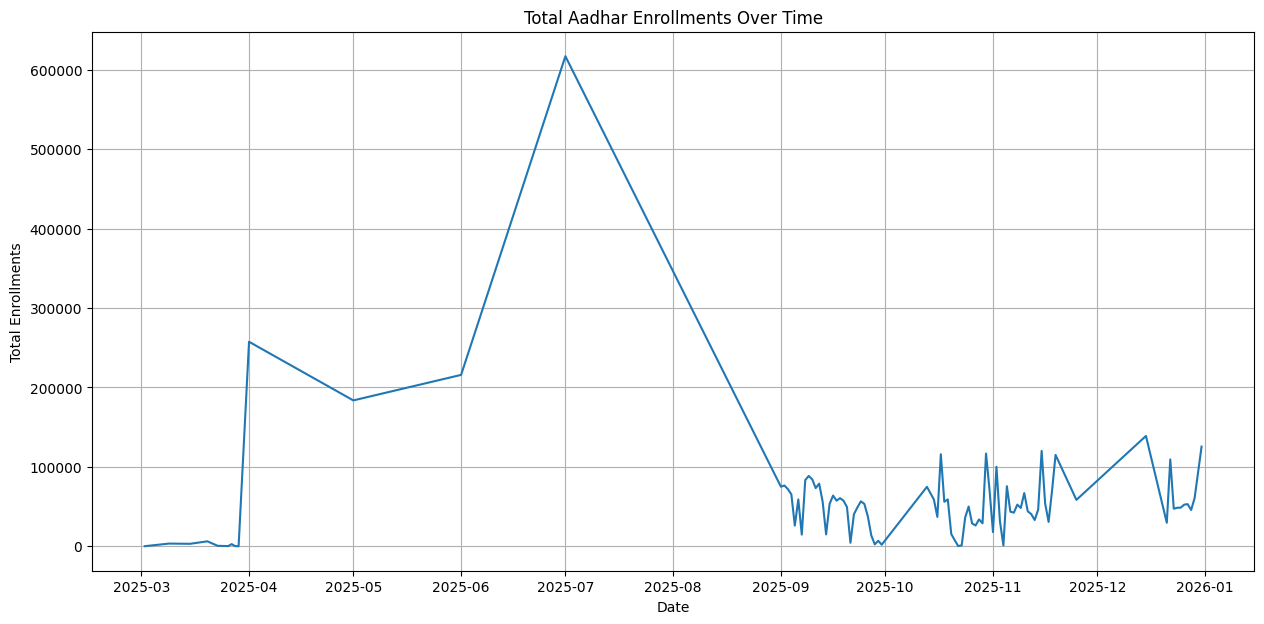

In [333]:
# Calculate total enrollments per day
df['total_enrollments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
daily_enrollments = df.groupby('date')['total_enrollments'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='total_enrollments', data=daily_enrollments)
plt.title('Total Aadhar Enrollments Over Time')
plt.xlabel('Date')
plt.ylabel('Total Enrollments')
plt.grid(True)
plt.show()

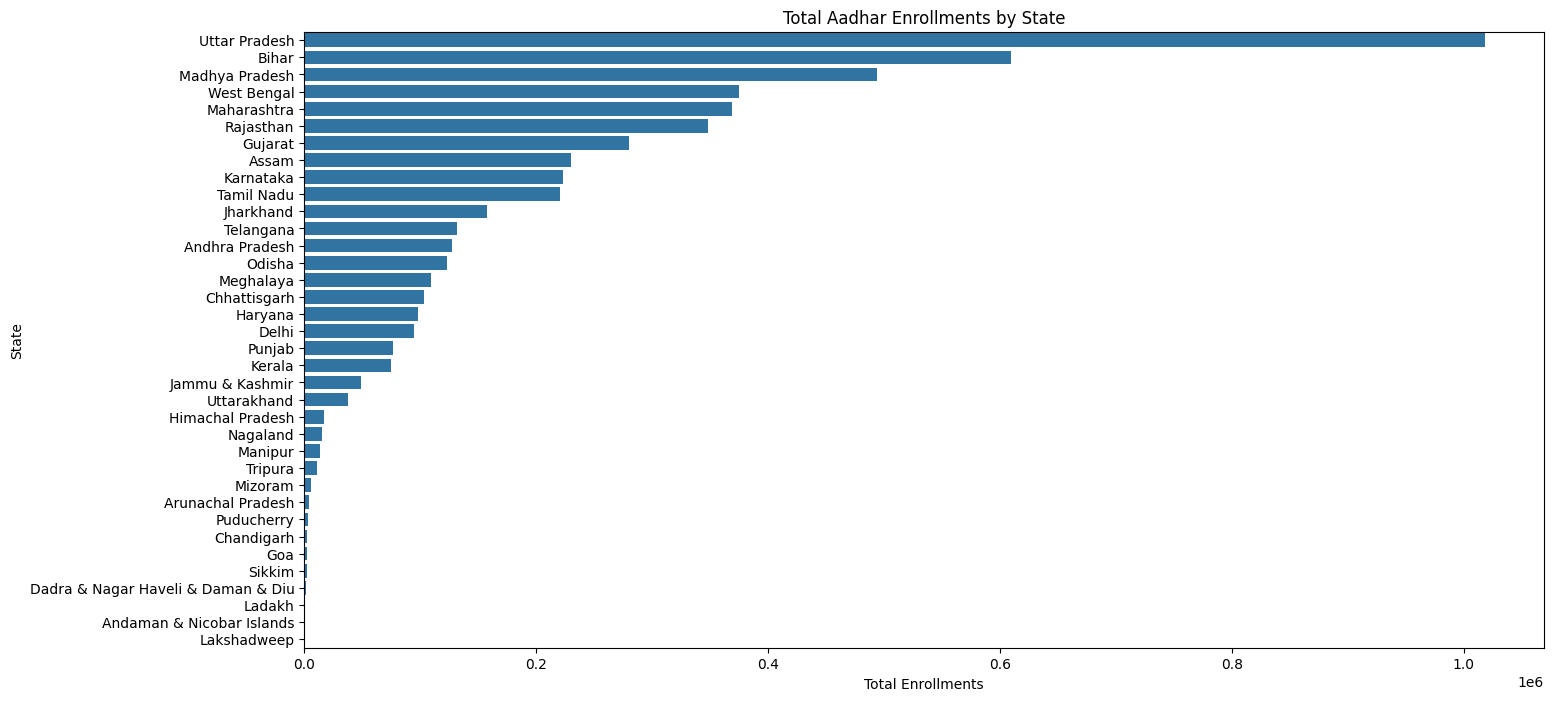

In [334]:
# Calculate total enrollments per state
state_enrollments = df.groupby('state_clean')['total_enrollments'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='total_enrollments', y='state_clean', data=state_enrollments)
plt.title('Total Aadhar Enrollments by State')
plt.xlabel('Total Enrollments')
plt.ylabel('State')
plt.show()

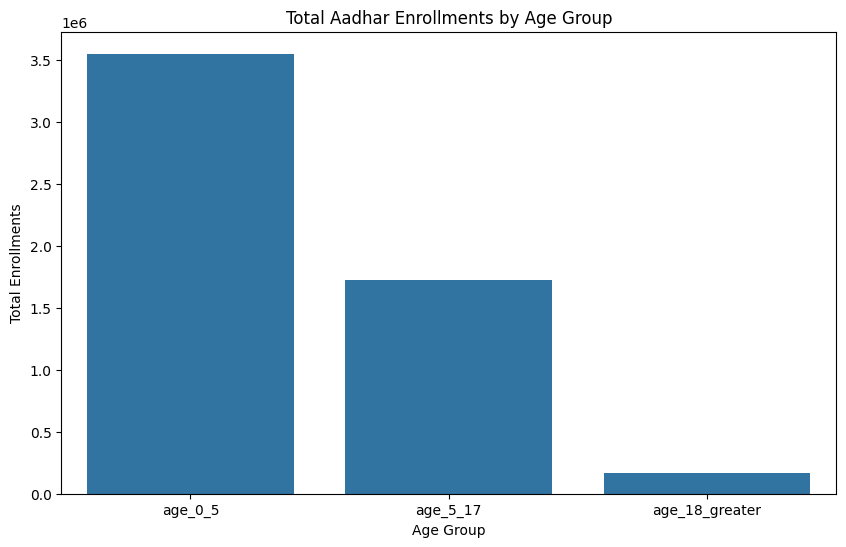

In [335]:
# Sum enrollments for each age group
age_group_sums = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_sums.index, y=age_group_sums.values)
plt.title('Total Aadhar Enrollments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Enrollments')
plt.show()

In [336]:
e1["state"].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA'], dtype=object)

In [337]:
e2["state"].unique()

array(['Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Pondicherry'], dtype=object)

In [338]:
e3["state"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'West Bengal',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa',
       'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'Bihar', 'Chandigarh', 'Sikkim', 'West Bangal',
       'Dadra and Nagar Haveli', 'Daman and Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Jammu & Kashmir',
       'andhra pradesh', 'Dadra & Nagar Haveli', 'Westbengal',
       'Daman & Diu', 'WESTBENGAL', 'West bengal', 'West  Bengal',
       'WEST BENGAL', '100000'], dtype=object)

In [339]:
e1["date_formatted"] = pd.to_datetime(e1["date"], format='%d-%m-%Y').dt.strftime("%Y%m%d")
e2["date_formatted"] = pd.to_datetime(e2["date"], format='%d-%m-%Y').dt.strftime("%Y%m%d")
e3["date_formatted"] = pd.to_datetime(e3["date"], format='%d-%m-%Y').dt.strftime("%Y%m%d")

In [340]:
print(e1["date_formatted"].isnull().sum())
print(e2["date_formatted"].isnull().sum())
print(e3["date_formatted"].isnull().sum())

0
0
0


In [341]:
print(e1['date_formatted'].max(), e1['date_formatted'].max())
print(e2['date_formatted'].max(), e2['date_formatted'].max())
print(e3['date_formatted'].max(), e3['date_formatted'].max())

20251026 20251026
20251231 20251231
20251231 20251231


In [342]:
# Merging Datasets
df = pd.concat([e1, e2, e3], axis = 0, ignore_index= True)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
 7   date_formatted  1006029 non-null  object
dtypes: int64(4), object(4)
memory usage: 61.4+ MB


In [ ]:
print(df.isnull().sum())

In [344]:
df["state"].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [345]:
df["state"].nunique()

55

In [346]:
def CleanStateNames(i):
  if pd.isna(i):
    return i
  i = str(i).lower()
  i = re.sub(r'[^a-z\s]', ' ', i)
  i = re.sub(r'\s+', ' ', i).strip()
  return i


In [347]:
state_mapping = {
    # West Bengal
    'west bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'westbengal ': 'West Bengal',

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu & Kashmir',
    'jammu kashmir': 'Jammu & Kashmir',

    # Collapse all Dadra / Daman variants into ONE state
    'dadra nagar haveli': 'Dadra & Nagar Haveli & Daman & Diu',
    'dadra and nagar haveli': 'Dadra & Nagar Haveli & Daman & Diu',
    'daman and diu': 'Dadra & Nagar Haveli & Daman & Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra & Nagar Haveli & Daman & Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra & Nagar Haveli & Daman & Diu',
    'daman diu': 'Dadra & Nagar Haveli & Daman & Diu',


    # Puducherry
    'puducherry': 'Puducherry',


    # Andaman & Nicobar Islands
    'andaman and nicobar islands': 'Andaman & Nicobar Islands',
    'andaman nicobar islands': 'Andaman & Nicobar Islands',

    # Puducherry
    'pondicherry': 'Puducherry',

    # Case-normalized direct matches
    'delhi': 'Delhi',
    'ladakh': 'Ladakh',
    'goa': 'Goa',
    'sikkim': 'Sikkim',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'punjab': 'Punjab',
    'kerala': 'Kerala',
    'haryana': 'Haryana',
    'gujarat': 'Gujarat',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'karnataka': 'Karnataka',
    'maharashtra': 'Maharashtra',
    'rajasthan': 'Rajasthan',
    'uttar pradesh': 'Uttar Pradesh',
    'madhya pradesh': 'Madhya Pradesh',
    'himachal pradesh': 'Himachal Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'chhattisgarh': 'Chhattisgarh',
    'jharkhand': 'Jharkhand',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'tripura': 'Tripura',
    'uttarakhand': 'Uttarakhand',
    'lakshadweep': 'Lakshadweep',
    'chandigarh': 'Chandigarh'
}


In [348]:
df['state_clean'] = (
    df['state']
    .apply(CleanStateNames)
    .map(state_mapping)
)

In [ ]:
df["state_clean"].nunique()

In [ ]:
df = df[~df['state'].astype(str).str.isnumeric()]
unmapped = df[df['state_clean'].isna()]['state'].unique()
print("Unmapped values:", unmapped)

In [349]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,date_formatted,state_clean
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,20250302,Meghalaya
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,20250309,Karnataka
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,20250309,Uttar Pradesh
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,20250309,Uttar Pradesh
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,20250309,Karnataka
...,...,...,...,...,...,...,...,...,...
1006024,31-12-2025,Telangana,Hyderabad,500045,4,5,1,20251231,Telangana
1006025,31-12-2025,Telangana,Hyderabad,500057,0,2,0,20251231,Telangana
1006026,31-12-2025,Telangana,Hyderabad,500061,4,2,0,20251231,Telangana
1006027,31-12-2025,Telangana,Hyderabad,500062,1,4,0,20251231,Telangana


In [350]:
df.dtypes

,0
date,object
state,object
district,object
pincode,int64
age_0_5,int64
age_5_17,int64
age_18_greater,int64
date_formatted,object
state_clean,object


In [351]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values(by='date')

In [352]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df.shape

In [ ]:
unique_districts = df['district'].nunique()
print(f"Total number of unique districts: {unique_districts}")

## Univariate Analysis: Numerical Features


**Reasoning**:
The first instruction is to calculate descriptive statistics for the specified numerical columns. I will select the columns and use the `.describe()` method.



In [353]:
df['total_enrollments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']
print(df[numerical_cols].describe())

            age_0_5      age_5_17  age_18_greater  total_enrollments
count  1.006029e+06  1.006029e+06    1.006029e+06       1.006029e+06
mean   3.525709e+00  1.710074e+00    1.673441e-01       5.403127e+00
std    1.753851e+01  1.436963e+01    3.220525e+00       3.158275e+01
min    0.000000e+00  0.000000e+00    0.000000e+00       1.000000e+00
25%    1.000000e+00  0.000000e+00    0.000000e+00       1.000000e+00
50%    2.000000e+00  0.000000e+00    0.000000e+00       2.000000e+00
75%    3.000000e+00  1.000000e+00    0.000000e+00       5.000000e+00
max    2.688000e+03  1.812000e+03    8.550000e+02       3.965000e+03


**Reasoning**:
Having calculated the descriptive statistics, the next step is to visualize the distribution of these numerical features using histograms, as specified in the subtask instructions. I will create a grid of subplots for better organization and display each histogram with appropriate labels and titles.


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['total_enrollments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
print(" 'total_enrollments' column created successfully.")

**Reasoning**:
The previous code failed because the 'total_enrollments' column was not present in the current `df` DataFrame. I need to calculate this column by summing the age group columns before attempting to access it.



In [ ]:
df['total_enrollments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']
print(df[numerical_cols].describe())

**Reasoning**:
Having calculated the descriptive statistics, the next step is to visualize the distribution of these numerical features using histograms, as specified in the subtask instructions. I will create a grid of subplots for better organization and display each histogram with appropriate labels and titles.



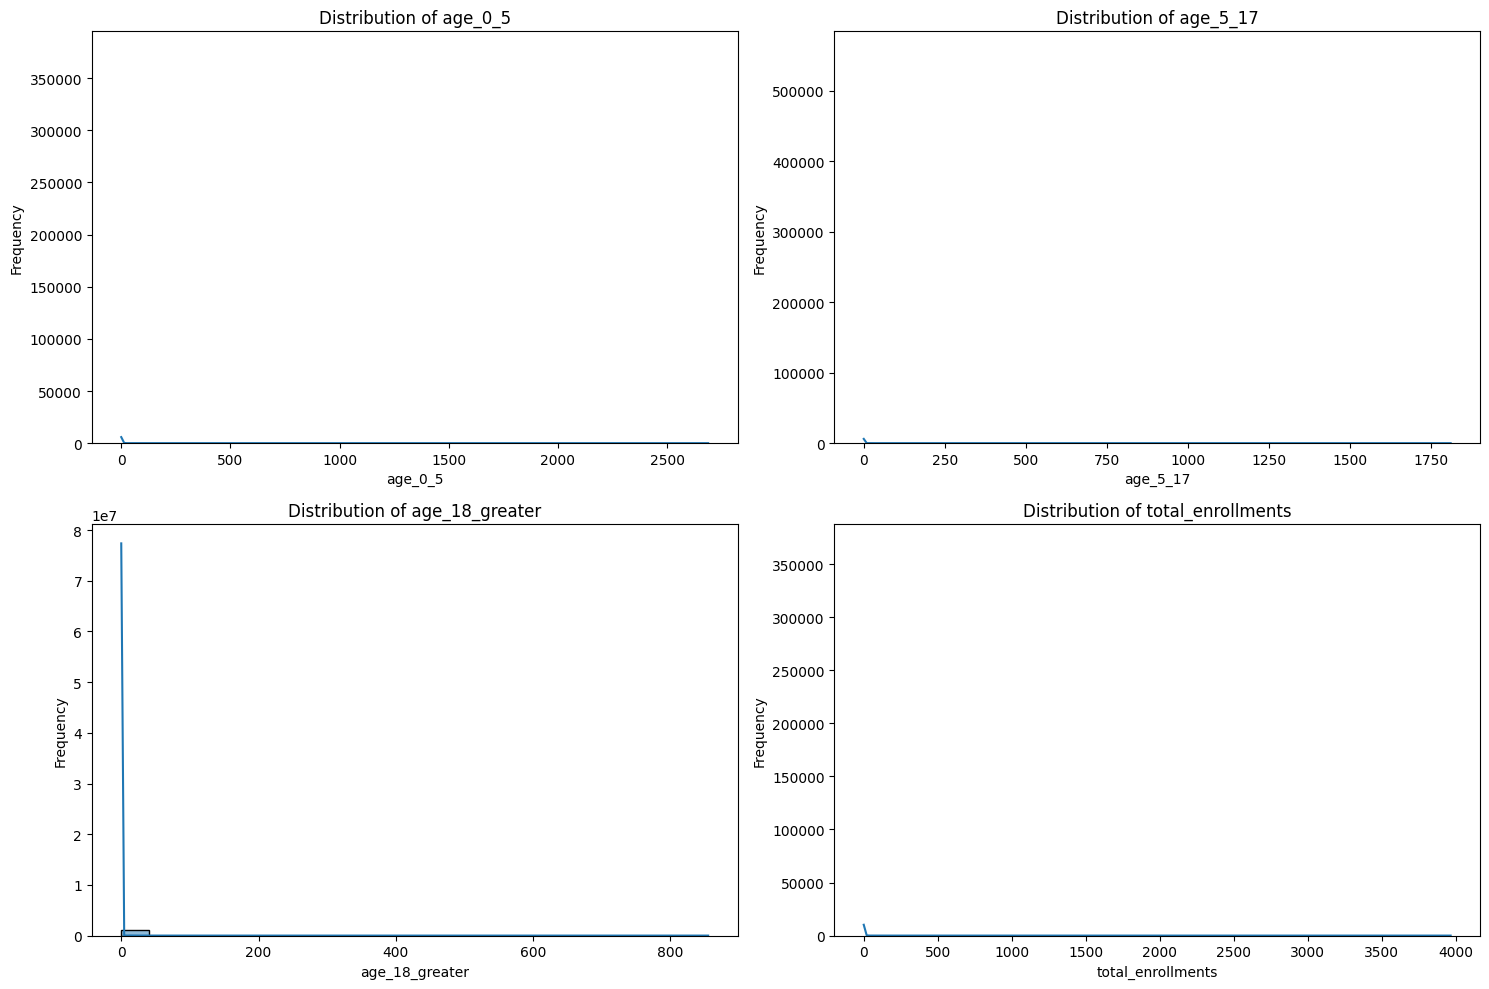

In [310]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Following the subtask instructions, I will now create box plots for each numerical column to visualize their spread and identify potential outliers. I will use a grid of subplots for better organization, similar to the histograms, and ensure each plot has appropriate labels and titles.



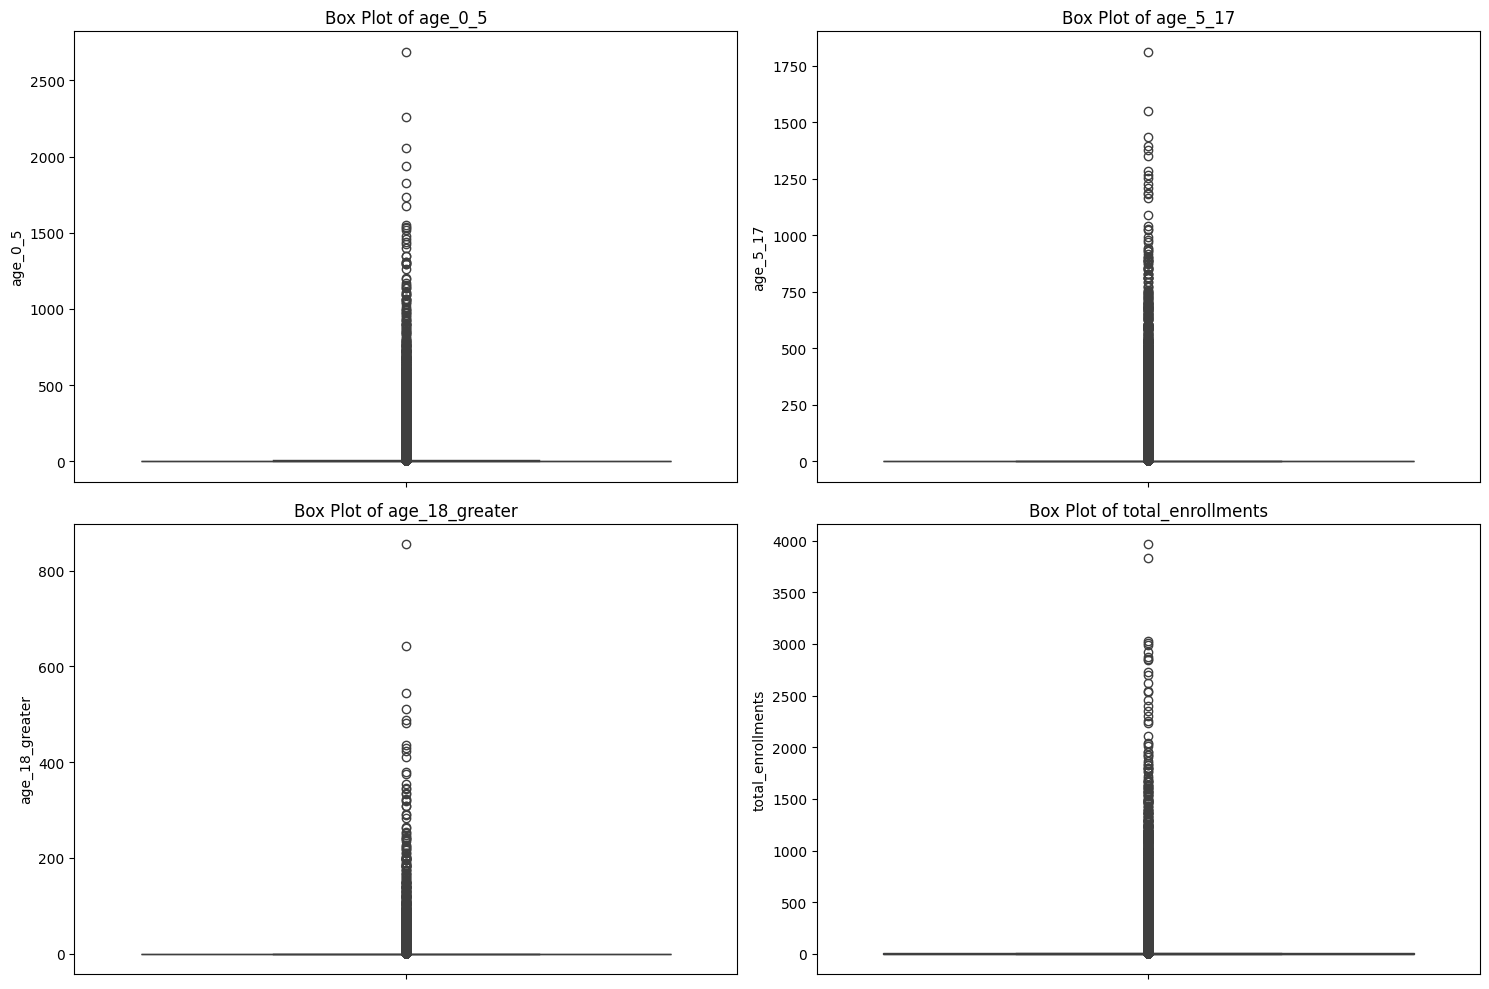

In [312]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Univariate Analysis: Categorical Features


**Reasoning**:
The first step is to calculate the frequency counts of the `state_clean` column and then select the top 10 most frequent states, as specified in the instructions. This will provide the data needed for the bar plot.



In [314]:
state_counts = df['state_clean'].value_counts()
top_10_states = state_counts.head(10)
print(top_10_states)

state_clean
Uttar Pradesh     110369
Tamil Nadu         92552
Maharashtra        77191
West Bengal        76561
Karnataka          70198
Andhra Pradesh     65663
Bihar              60567
Rajasthan          56159
Madhya Pradesh     50225
Odisha             47011
Name: count, dtype: int64


**Reasoning**:
Having calculated the frequency counts for the top 10 states, the next step is to visualize this data using a bar plot, as per the subtask instructions. I will use `seaborn.barplot` to show the distribution, ensuring proper labels and a title.



/tmp/ipython-input-3136231075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis', legend=False)


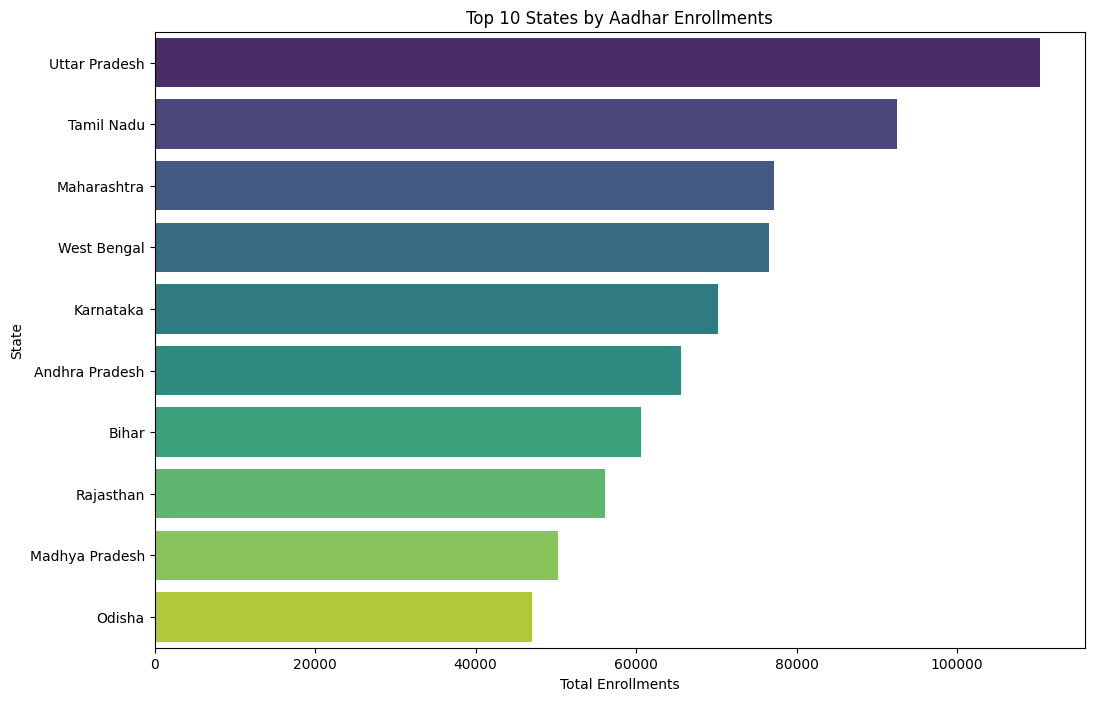

In [316]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis', legend=False)
plt.title('Top 10 States by Aadhar Enrollments')
plt.xlabel('Total Enrollments')
plt.ylabel('State')
plt.show()

**Reasoning**:
The previous code produced a `FutureWarning` regarding the use of `palette` without `hue` in `sns.barplot`. To address this and align with best practices, I will explicitly set `hue` to the categorical variable and `legend` to `False`.



### Age Group Enrollment Distribution in Top States (Grouped Bar Chart)

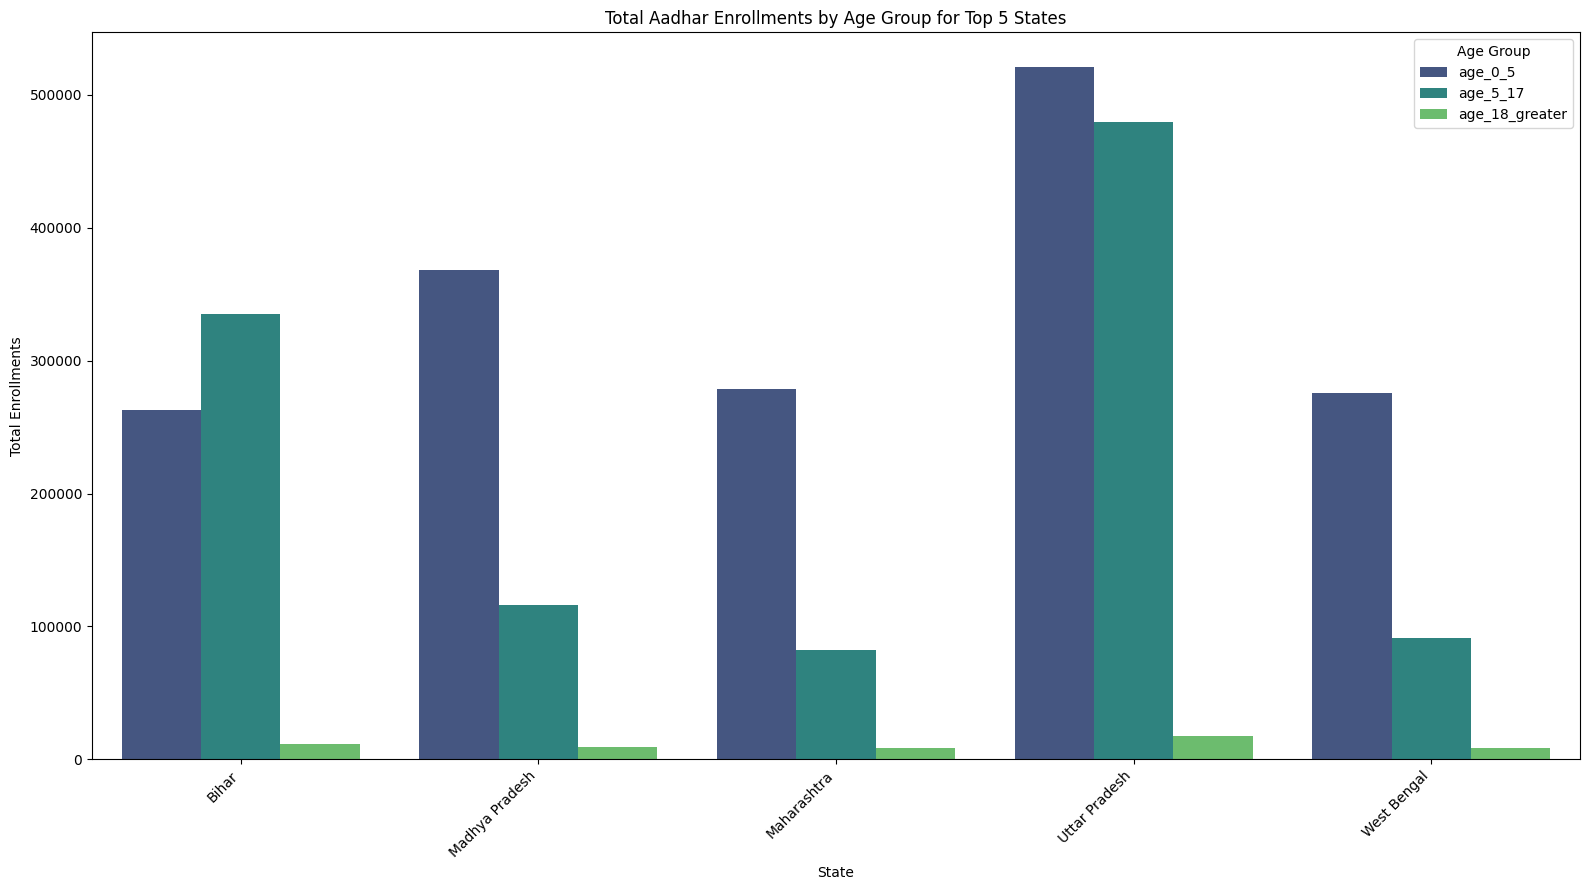

In [318]:
# Get the top 5 states by total enrollments (reusing state_total_enrollments calculated earlier)
top_5_states = state_total_enrollments.head(5).index.tolist()

# Filter the DataFrame for these top 5 states
df_top_5_states = df[df['state_clean'].isin(top_5_states)]

# Prepare data for grouped bar chart: melt age group columns
df_age_groups_melted = df_top_5_states.groupby('state_clean')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
df_age_groups_melted = df_age_groups_melted.melt(id_vars='state_clean', var_name='Age Group', value_name='Total Enrollments')

plt.figure(figsize=(16, 9))
sns.barplot(x='state_clean', y='Total Enrollments', hue='Age Group', data=df_age_groups_melted, palette='viridis')
plt.title('Total Aadhar Enrollments by Age Group for Top 5 States')
plt.xlabel('State')
plt.ylabel('Total Enrollments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

**Reasoning**:
The subtask instructs to calculate and print the correlation matrix for the numerical features. I will select the specified numerical columns and use the `.corr()` method to compute their pairwise correlation, then print the result.



In [320]:
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    age_0_5  age_5_17  age_18_greater  total_enrollments
age_0_5            1.000000  0.773063        0.334972           0.941176
age_5_17           0.773063  1.000000        0.492905           0.934491
age_18_greater     0.334972  0.492905        1.000000           0.512130
total_enrollments  0.941176  0.934491        0.512130           1.000000


**Reasoning**:
Following the subtask instructions, I will now create a pair plot using `seaborn.pairplot` to visualize the relationships between the numerical features. This will provide a comprehensive visual overview of the pairwise distributions and correlations.



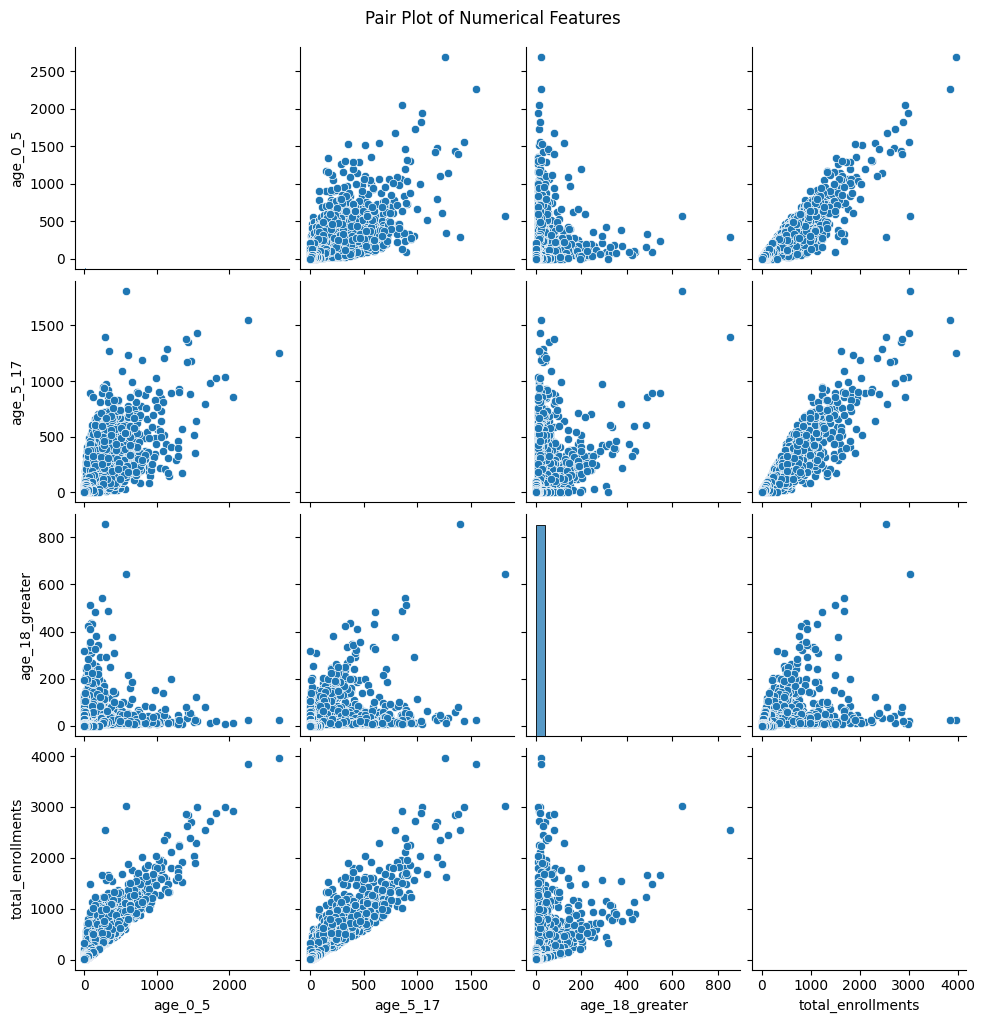

In [322]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Adjust suptitle position
plt.show()

## Bivariate Analysis: Numerical vs. Categorical


**Reasoning**:
First, I need to calculate the mean 'total_enrollments' for each 'state_clean' and identify the top 10 states based on these mean values. This will allow me to filter the DataFrame for the relevant states for visualization.



In [323]:
mean_enrollments_by_state = df.groupby('state_clean')['total_enrollments'].mean().sort_values(ascending=False)
top_10_states_by_mean = mean_enrollments_by_state.head(10).index

df_top_10_states = df[df['state_clean'].isin(top_10_states_by_mean)]
print("Top 10 States by Mean Total Enrollments:\n", top_10_states_by_mean)

Top 10 States by Mean Total Enrollments:
 Index(['Meghalaya', 'Delhi', 'Bihar', 'Madhya Pradesh', 'Uttar Pradesh',
       'Nagaland', 'Assam', 'Jharkhand', 'Rajasthan', 'Haryana'],
      dtype='object', name='state_clean')


**Reasoning**:
Now that the `df_top_10_states` DataFrame is prepared, the next step is to create a box plot to visualize the distribution of 'total_enrollments' for each of these top 10 states, as per the subtask instructions. This will allow for a comparison of enrollment distributions across the selected states.



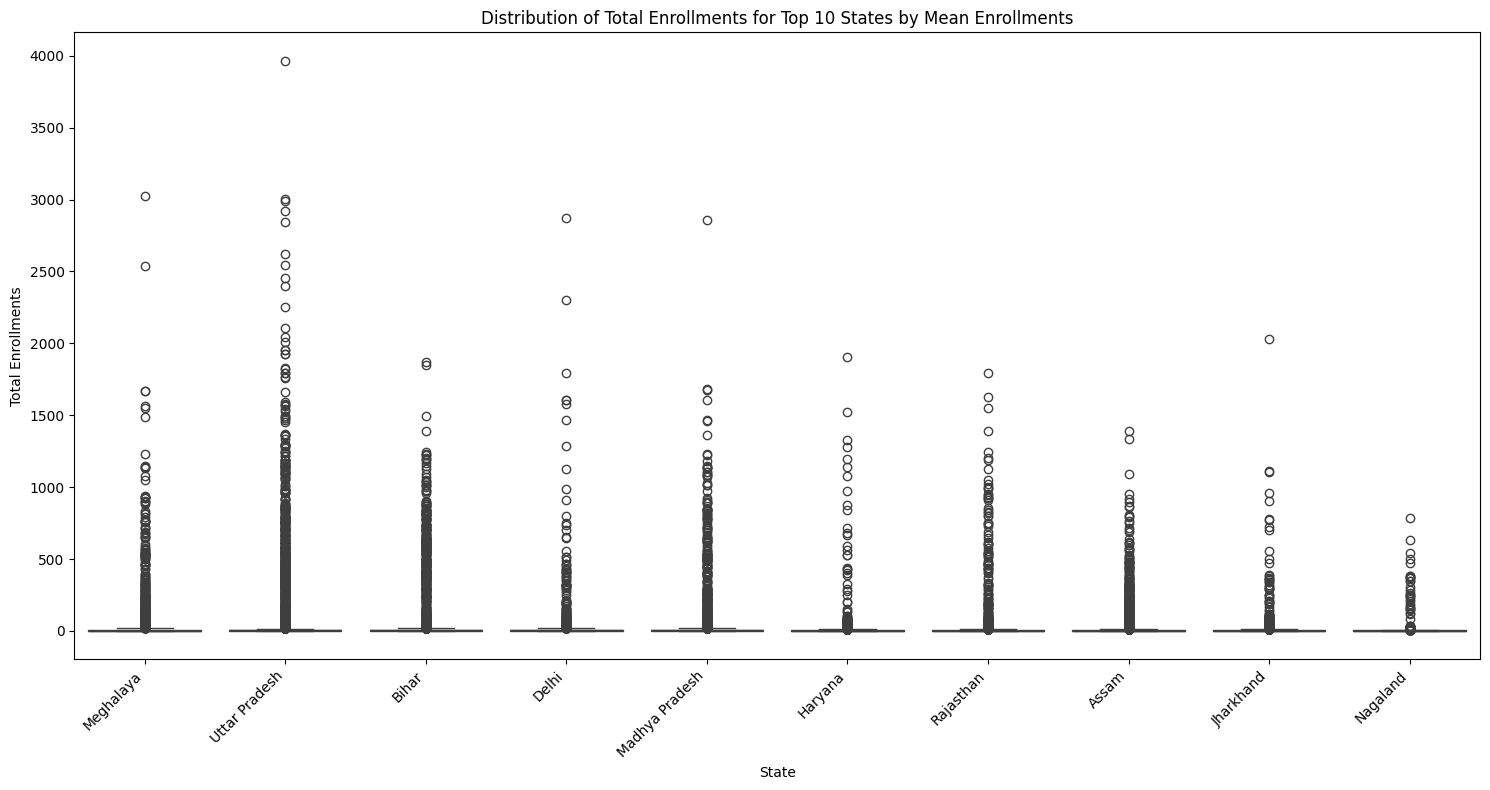

In [324]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='state_clean', y='total_enrollments', data=df_top_10_states)
plt.title('Distribution of Total Enrollments for Top 10 States by Mean Enrollments')
plt.xlabel('State')
plt.ylabel('Total Enrollments')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Bivariate Analysis: Time Series


**Reasoning**:
The first step in time series analysis is to aggregate the data by the specified time period. I will aggregate 'total_enrollments' by month by setting 'date' as the index, resampling monthly, and then summing the enrollments.



In [325]:
monthly_enrollments = df.set_index('date')['total_enrollments'].resample('M').sum().reset_index()
print("Monthly Enrollments Head:\n", monthly_enrollments.head())

Monthly Enrollments Head:
         date  total_enrollments
0 2025-03-31              16582
1 2025-04-30             257438
2 2025-05-31             183616
3 2025-06-30             215734
4 2025-07-31             616868


/tmp/ipython-input-2993394562.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_enrollments = df.set_index('date')['total_enrollments'].resample('M').sum().reset_index()


**Reasoning**:
The previous code successfully aggregated monthly enrollments but issued a `FutureWarning` for the use of 'M' in `resample`. I will correct this warning by using 'ME' for monthly aggregation. Then, as per the instructions, I will plot the monthly enrollments. Following that, I will perform yearly aggregation using 'YE' and plot the yearly trends to complete the time series analysis.



Monthly Enrollments Head:
         date  total_enrollments
0 2025-03-31              16582
1 2025-04-30             257438
2 2025-05-31             183616
3 2025-06-30             215734
4 2025-07-31             616868


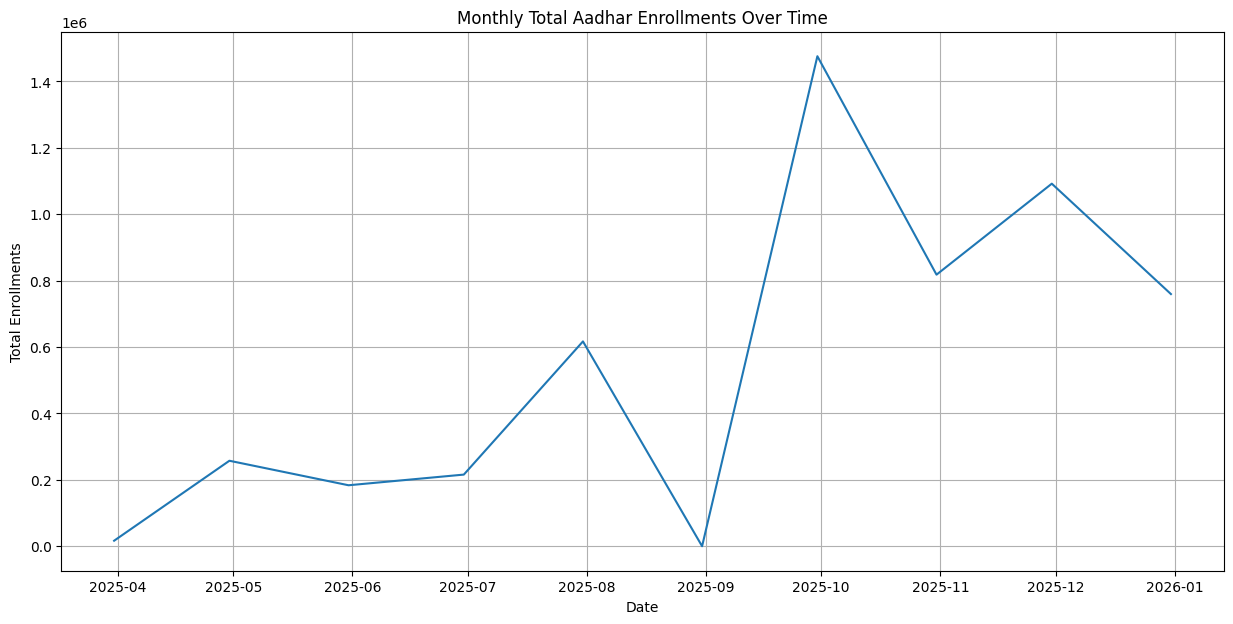


Yearly Enrollments Head:
         date  total_enrollments
0 2025-12-31            5435484


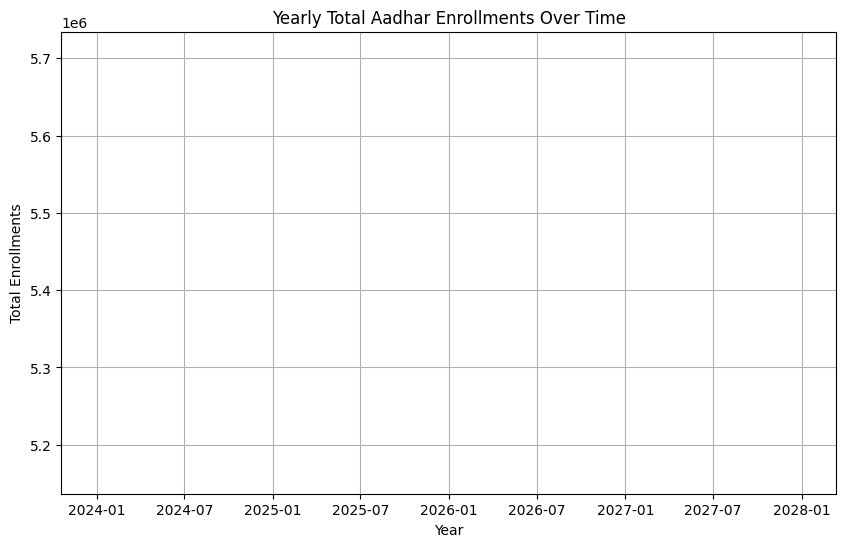

In [326]:
monthly_enrollments = df.set_index('date')['total_enrollments'].resample('ME').sum().reset_index()
print("Monthly Enrollments Head:\n", monthly_enrollments.head())

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='total_enrollments', data=monthly_enrollments)
plt.title('Monthly Total Aadhar Enrollments Over Time')
plt.xlabel('Date')
plt.ylabel('Total Enrollments')
plt.grid(True)
plt.show()

yearly_enrollments = df.set_index('date')['total_enrollments'].resample('YE').sum().reset_index()
print("\nYearly Enrollments Head:\n", yearly_enrollments.head())

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_enrollments', data=yearly_enrollments)
plt.title('Yearly Total Aadhar Enrollments Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollments')
plt.grid(True)
plt.show()

## Trivariate Analysis: Interactions


**Reasoning**:
To perform a trivariate analysis exploring the trend of total enrollments over time for different states, I first need to identify a manageable number of top states. I will calculate the total enrollments for each state, and then select the top 10 states by total enrollments. This will help in creating a clear and interpretable visualization.



In [327]:
state_total_enrollments = df.groupby('state_clean')['total_enrollments'].sum().sort_values(ascending=False)
top_10_states_trivariate = state_total_enrollments.head(10).index.tolist()

print("Top 10 States by Total Enrollments for Trivariate Analysis:", top_10_states_trivariate)


Top 10 States by Total Enrollments for Trivariate Analysis: ['Uttar Pradesh', 'Bihar', 'Madhya Pradesh', 'West Bengal', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Assam', 'Karnataka', 'Tamil Nadu']


**Reasoning**:
Now that the top 10 states for trivariate analysis have been identified, I will filter the main DataFrame to include only these states. Then, I will aggregate the total enrollments by date and state for these selected states to prepare the data for plotting the trend over time with hue.



In [328]:
df_top_states_trivariate = df[df['state_clean'].isin(top_10_states_trivariate)]

daily_enrollments_top_states = df_top_states_trivariate.groupby(['date', 'state_clean'])['total_enrollments'].sum().reset_index()
print("Head of Daily Enrollments for Top States:\n", daily_enrollments_top_states.head())

Head of Daily Enrollments for Top States:
         date     state_clean  total_enrollments
0 2025-03-09           Bihar               1005
1 2025-03-09       Karnataka                248
2 2025-03-09  Madhya Pradesh                242
3 2025-03-09     Maharashtra                100
4 2025-03-09       Rajasthan                 94


**Reasoning**:
Now that the daily enrollments for the top states have been aggregated, I will visualize their trends over time using a line plot with `state_clean` as the hue, as specified in the subtask instructions for trivariate analysis.



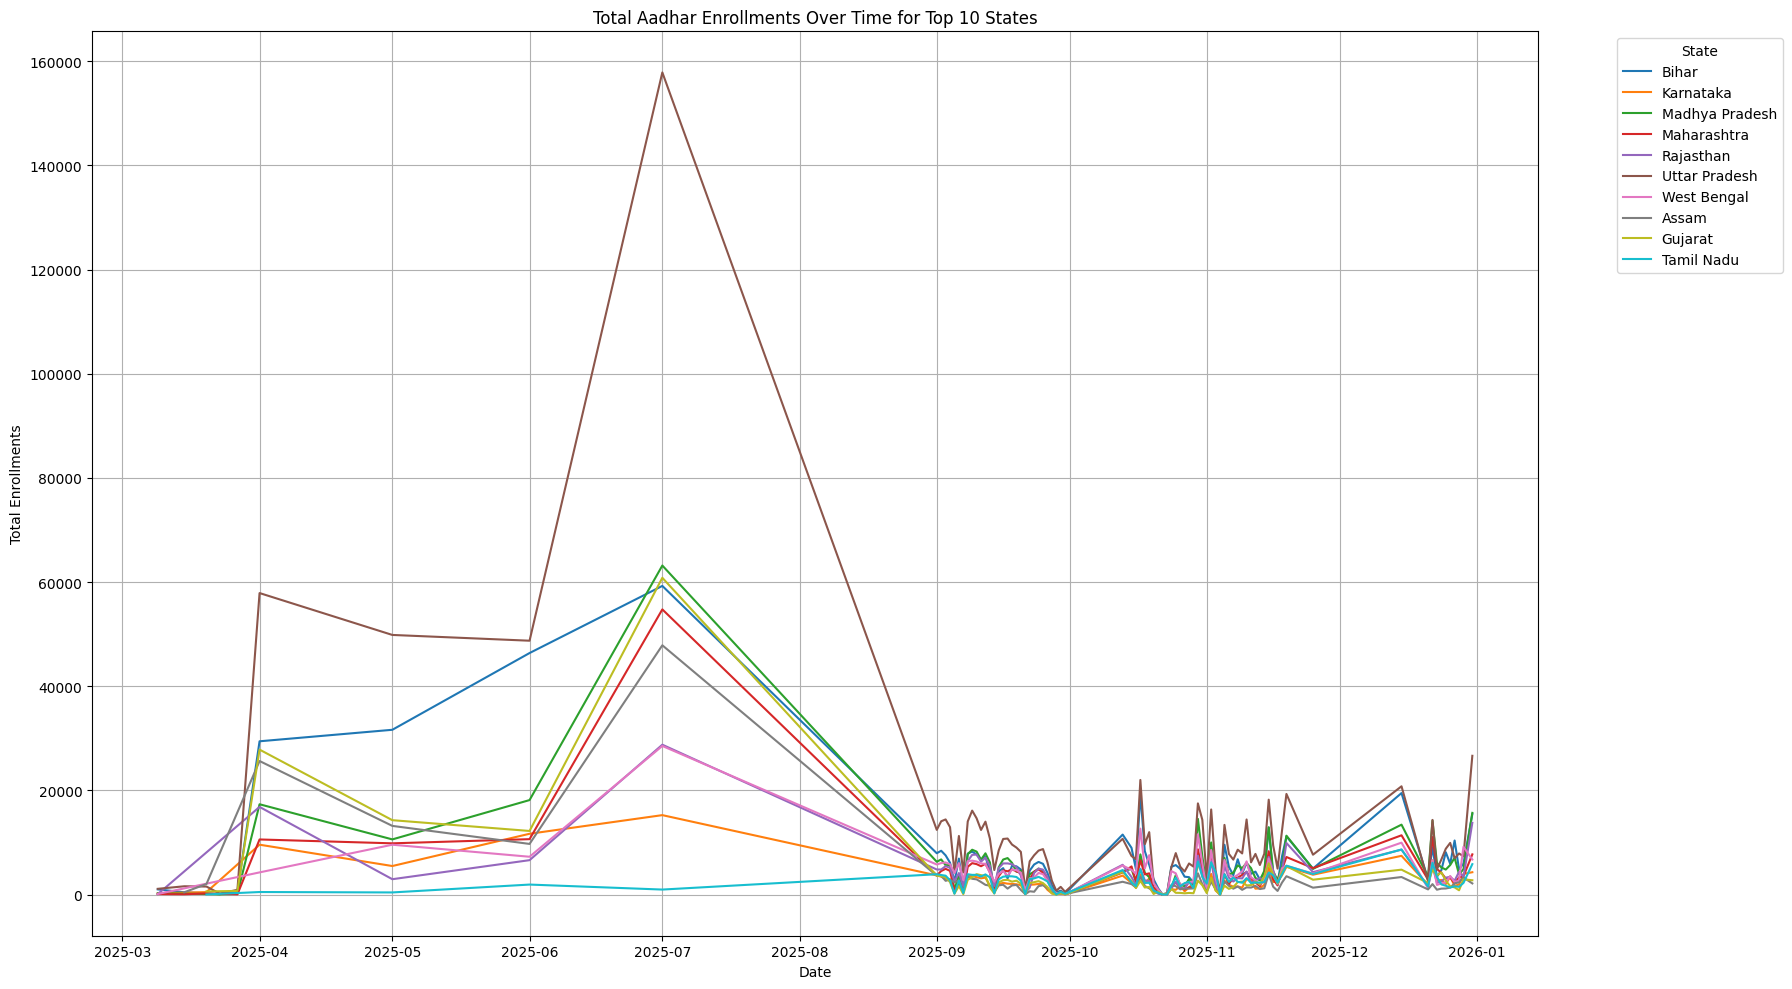

In [329]:
plt.figure(figsize=(18, 10))
sns.lineplot(x='date', y='total_enrollments', hue='state_clean', data=daily_enrollments_top_states)
plt.title('Total Aadhar Enrollments Over Time for Top 10 States')
plt.xlabel('Date')
plt.ylabel('Total Enrollments')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
